In [758]:
!pip3 install eng-to-ipa

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [759]:
import eng_to_ipa as ipa
ipa.convert("The quick brown fox jumped over the lazy dog.")

'ðə kwɪk braʊn fɑks ʤəmpt ˈoʊvər ðə ˈleɪzi dɔg.'

In [760]:
ipa.convert("waiting")

'ˈweɪtɪŋ'

In [761]:
convert_dict = {
    'i': ["uv1"], # sometimes can be duplicated like "see"
    'ɪ': ["uv1"],
    'ɛ': ["uv2"],
    'e': ["uv2"],
    'æ': ["uv3"],
    'ʊ': ["mv1"],
    'ə': ["mv2"],
    'ɑ': ["mv3"],
    'a': ["mv3"],
    'u': ["lv1"],
    'o': ["lv2"],
    'ɔ': ["lv3"],

    'j': ["uv1"],
    'w': ["lv1"],

    'θ': ["th"],
    'ð': ["dh"],
    'ʃ': ["sh"],
    'ʒ': ["zh"],

    'ʤ': ["d","zh"],
    'ʧ': ["t","sh"],

    'ŋ': ["ng"],

    'ˈ': [],
    'ˌ': [],
    '*': [],
    
    ' ': [" "]
}

In [762]:
def grafoni_spell(string):
    ipa_string = ipa.convert(string)
    out = []
    for letter in ipa_string:
        if letter in convert_dict:
            out += convert_dict[letter]
        else:
            out += [letter]
    return out

In [763]:
grafoni_spell("I see you studying")

['mv3',
 'uv1',
 ' ',
 's',
 'uv1',
 ' ',
 'uv1',
 'lv1',
 ' ',
 's',
 't',
 'mv2',
 'd',
 'uv1',
 'uv1',
 'ng']

In [764]:
ipa.convert("studying")

'ˈstədiɪŋ'

In [765]:
grafoni_spell("moths months studying")

['m',
 'lv3',
 'th',
 's',
 ' ',
 'm',
 'mv2',
 'n',
 'th',
 's',
 ' ',
 's',
 't',
 'mv2',
 'd',
 'uv1',
 'uv1',
 'ng']

In [766]:
import drawsvg as draw

def bounding_box(strokes):
    min_x = 0
    min_y = 0
    max_x = 0
    max_y = 0
    for stroke in strokes:
        if stroke[0] == 'move':
            min_x = min(min_x,stroke[1])
            min_y = min(min_y,stroke[2])
            max_x = max(max_x,stroke[1])
            max_y = max(max_y,stroke[2])
        if stroke[0] == 'line':
            min_x = min(min_x,stroke[1])
            min_y = min(min_y,stroke[2])
            max_x = max(max_x,stroke[1])
            max_y = max(max_y,stroke[2])
        if stroke[0] == 'quadratic':
            min_x = min(min_x,stroke[1],stroke[3])
            min_y = min(min_y,stroke[2],stroke[4])
            max_x = max(max_x,stroke[1],stroke[3])
            max_y = max(max_y,stroke[2],stroke[4])
        if stroke[0] == 'cubic':
            min_x = min(min_x,stroke[1],stroke[3],stroke[5])
            min_y = min(min_y,stroke[2],stroke[4],stroke[6])
            max_x = max(max_x,stroke[1],stroke[3],stroke[5])
            max_y = max(max_y,stroke[2],stroke[4],stroke[6])
    return min_x, min_y, max_x, max_y

def svgStrokes(strokes, scale = 4,padding = 1, stroke_width = 1.0/3):
    path = draw.Path(stroke='black', fill='none', stroke_width = stroke_width*scale, stroke_linecap='round', stroke_linejoin='round')
    min_x,min_y,max_x,max_y = bounding_box(strokes)
    for stroke in strokes:
        if stroke[0] == 'move':
            path.M(scale*(stroke[1]-min_x)+scale*padding,scale*(stroke[2]-min_y)+scale*padding)
        if stroke[0] == 'line':
            path.L(scale*(stroke[1]-min_x)+scale*padding,scale*(stroke[2]-min_y)+scale*padding)
        if stroke[0] == 'quadratic':
            path.Q(scale*(stroke[1]-min_x)+scale*padding,scale*(stroke[2]-min_y)+scale*padding,scale*(stroke[3]-min_x)+scale*padding,scale*(stroke[4]-min_y)+scale*padding)
        if stroke[0] == 'cubic':
            path.C(scale*(stroke[1]-min_x)+scale*padding,scale*(stroke[2]-min_y)+scale*padding,scale*(stroke[3]-min_x)+scale*padding,scale*(stroke[4]-min_y)+scale*padding,scale*(stroke[5]-min_x)+scale*padding,scale*(stroke[6]-min_y)+scale*padding)
    
    d = draw.Drawing(scale*(max_x-min_x)+2*scale*padding,scale*(max_y-min_y)+2*scale*padding)
    d.append(draw.Use(path,0,0))
    return d

def translate(strokes,dx,dy):
    out = []
    for s in strokes:
        if s[0] == 'move':
            out.append(('move',s[1]+dx,s[2]+dy))
        if s[0] == 'line':
            out.append(('line',s[1]+dx,s[2]+dy))
        if s[0] == 'quadratic':
            out.append(('quadratic',s[1]+dx,s[2]+dy,s[3]+dx,s[4]+dy))
        if s[0] == 'cubic':
            out.append(('cubic',s[1]+dx,s[2]+dy,s[3]+dx,s[4]+dy,s[5]+dx,s[6]+dy))
    return out

def scale(strokes,dx,dy):
    out = []
    for s in strokes:
        if s[0] == 'move':
            out.append(('move',s[1]*dx,s[2]*dy))
        if s[0] == 'line':
            out.append(('line',s[1]*dx,s[2]*dy))
        if s[0] == 'quadratic':
            out.append(('quadratic',s[1]*dx,s[2]*dy,s[3]*dx,s[4]*dy))
        if s[0] == 'cubic':
            out.append(('cubic',s[1]*dx,s[2]*dy,s[3]*dx,s[4]*dy,s[5]*dx,s[6]*dy))
    return out

def concat(strokes, new):
    last_x, last_y = strokes[-1][-2:]
    return strokes + translate(new,last_x,last_y)

In [767]:
from IPython.display import display

In [768]:
vowel_scale = 1.5

letter_forms_type = {
    " ": [('move',4,0)],

    "uv1": [('quadratic',1*vowel_scale,-1*vowel_scale,2*vowel_scale,0)],
    "uv2": [('quadratic',2*vowel_scale,-1*vowel_scale,4*vowel_scale,0)],
    "uv3": [('quadratic',4*vowel_scale,-1*vowel_scale,8*vowel_scale,0)],
    "mv1": [('line',2*vowel_scale,0)],
    "mv2": [('line',4*vowel_scale,0)],
    "mv3": [('line',8*vowel_scale,0)],
    "lv1": [('quadratic',1*vowel_scale,1*vowel_scale,2*vowel_scale,0)],
    "lv2": [('quadratic',2*vowel_scale,1*vowel_scale,4*vowel_scale,0)],
    "lv3": [('quadratic',4*vowel_scale,1*vowel_scale,8*vowel_scale,0)],

    "r": [('cubic',2,-2,2,-4,1,-4),('cubic',0,-4,0,-2,2,0)],
    "l": [('cubic',2,-2,2,-8,1,-8),('cubic',0,-8,0,-4,2,0)],
    "m": [('cubic',2,0,2,2,1,2),('cubic',0,2,0,0,2,0)],
    "n": [('cubic',2,2,2,4,1,4),('cubic',0,4,0,2,2,0)],
    "ng":[('cubic',2,2,2,8,1,8),('cubic',0,8,0,4,2,0)],

    "k": [('cubic',2,-2,0,-2,2,-4),('quadratic',0,-2,2,0)],
    "g": [('cubic',2,-2,0,-4,2,-8),('quadratic',0,-4,2,0)],
    "h": [('cubic',2,2,0,2,2,4),('quadratic',0,2,2,0)],
    "x": [('cubic',2,2,0,4,2,8),('quadratic',0,4,2,0)],

    "t": [('quadratic',2,0,2,-2),('move',2,-4),('line',2,0)],
    "d": [('quadratic',2,0,2,-2),('move',2,-8),('line',2,0)],
    "th": [('line',0,4),('move',0,2),('quadratic',0,0,2,0)],
    "dh": [('line',0,8),('move',0,2),('quadratic',0,0,2,0)],

    "p": [('quadratic',2,-2,0,-4),('cubic',2,-2,0,-2,2,0)],
    "b": [('quadratic',2,-4,0,-8),('cubic',2,-4,0,-2,2,0)],
    "f": [('quadratic',2,2,0,4),('cubic',2,2,0,2,2,0)],
    "v": [('quadratic',2,4,0,8),('cubic',2,4,0,2,2,0)],

    "s": [('quadratic',0,-4,1,-4),('quadratic',2,-4,2,0)],
    "z": [('quadratic',0,-8,1,-8),('quadratic',2,-8,2,0)],
    "sh": [('quadratic',0,4,1,4),('quadratic',2,4,2,0)],
    "zh": [('quadratic',0,8,1,8),('quadratic',2,8,2,0)],
}

In [769]:
from math import sqrt

def show_grafoni_type(in_string):
    chars = grafoni_spell(in_string)
    out = [('move',0,0)]
    for l in chars:
        if l in letter_forms_type:
            out = concat(out,letter_forms_type[l])
        else:
            print("error: " + l)
    return display(svgStrokes(out))

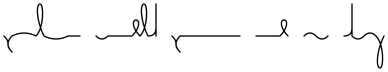

In [770]:
show_grafoni_type("hello world how are you doing")

In [771]:
# letter_forms = {
#     " ": [('move',4,0)],

#     "uv1": [('quadratic',1*vowel_scale,-1*vowel_scale,2*vowel_scale,0)],
#     "uv2": [('quadratic',2*vowel_scale,-2*vowel_scale,4*vowel_scale,0)],
#     "uv3": [('quadratic',4*vowel_scale,-4*vowel_scale,8*vowel_scale,0)],
#     "mv1": [('line',2*vowel_scale,0)],
#     "mv2": [('line',4*vowel_scale,0)],
#     "mv3": [('line',8*vowel_scale,0)],
#     "lv1": [('quadratic',1*vowel_scale,1*vowel_scale,2*vowel_scale,0)],
#     "lv2": [('quadratic',2*vowel_scale,2*vowel_scale,4*vowel_scale,0)],
#     "lv3": [('quadratic',4*vowel_scale,4*vowel_scale,8*vowel_scale,0)],

#     "r": [('cubic',1,-2,1,-4,0,-4),('cubic',-1,-4,-1,-2,0,0)],
#     "l": [('cubic',1,-2,1,-8,0,-8),('cubic',-1,-8,-1,-4,0,0)],
#     "m": [('cubic',1,0,1,2,0,2),('cubic',-1,2,-1,0,0,0)],
#     "n": [('cubic',1,2,1,4,0,4),('cubic',-1,4,-1,2,0,0)],
#     "ng":[('cubic',1,2,1,8,0,8),('cubic',-1,8,-1,4,0,0)],

#     "k": [('cubic',2,-2,0,-2,2,-4),('quadratic',0,-2,2,0)],
#     "g": [('cubic',2,-2,0,-4,2,-8),('quadratic',0,-4,2,0)],
#     "h": [('cubic',2,2,0,2,2,4),('quadratic',0,2,2,0)],
#     "x": [('cubic',2,2,0,4,2,8),('quadratic',0,4,2,0)],

#     "t": [('quadratic',2,0,2,-2),('line',2,-4),('line',2,0)],
#     "d": [('quadratic',2,0,2,-2),('line',2,-8),('line',2,0)],
#     "th": [('line',0,4),('line',0,2),('quadratic',0,0,2,0)],
#     "dh": [('line',0,8),('line',0,2),('quadratic',0,0,2,0)],

#     "p": [('quadratic',2,-2,0,-4),('cubic',2,-2,0,-2,2,0)],
#     "b": [('quadratic',2,-4,0,-8),('cubic',2,-4,0,-2,2,0)],
#     "f": [('quadratic',2,2,0,4),('cubic',2,2,0,2,2,0)],
#     "v": [('quadratic',2,4,0,8),('cubic',2,4,0,2,2,0)],

#     "s": [('quadratic',0,-4,1,-4),('quadratic',2,-4,2,0)],
#     "z": [('quadratic',0,-8,1,-8),('quadratic',2,-8,2,0)],
#     "sh": [('quadratic',0,4,1,4),('quadratic',2,4,2,0)],
#     "zh": [('quadratic',0,8,1,8),('quadratic',2,8,2,0)],

#     "k-beg": [('move',0,-4),('quadratic',-2,-2,0,0)],
#     "g-beg": [('move',0,-8),('quadratic',-2,-4,0,0)],
#     "h-beg": [('move',-1,4),('quadratic',-3,2,0,0)],
#     "x-beg": [('move',-2,8),('quadratic',-4,4,0,0)],

#     "t-beg": [('move',0,-4),('line',0,0)],
#     "d-beg": [('move',0,-8),('line',0,0)],
#     "th-beg": [('move',-1,4),('line',0,0)],
#     "dh-beg": [('move',-2,8),('line',0,0)],

#     "p-beg": [('move',0,-4),('quadratic',2,-2,0,0)],
#     "b-beg": [('move',0,-8),('quadratic',2,-4,0,0)],
#     "f-beg": [('move',-1,4),('quadratic',1,2,0,0)],
#     "v-beg": [('move',-2,8),('quadratic',0,4,0,0)],

#     "k-end": [('quadratic',-1,-2,1,-4),('move',0,0)],
#     "g-end": [('quadratic',0,-4,2,-8),('move',0,0)],
#     "h-end": [('quadratic',-2,2,0,4),('move',0,0)],
#     "x-end": [('quadratic',-2,4,0,8),('move',0,0)],

#     "t-end": [('line',1,-4),('move',0,0)],
#     "d-end": [('line',2,-8),('move',0,0)],
#     "th-end": [('line',0,4),('move',0,0)],
#     "dh-end": [('line',0,8),('move',0,0)],

#     "p-end": [('quadratic',3,-2,1,-4),('move',0,0)],
#     "b-end": [('quadratic',4,-4,2,-8),('move',0,0)],
#     "f-end": [('quadratic',2,2,0,4),('move',0,0)],
#     "v-end": [('quadratic',2,4,0,8),('move',0,0)],
# }

In [798]:
# don't like the random slopes

letter_forms = {
    " ": [('move',4,0)],

    "uv1": [('quadratic',1*vowel_scale,-1*vowel_scale,2*vowel_scale,0)],
    "uv2": [('quadratic',2*vowel_scale,-2*vowel_scale,4*vowel_scale,0)],
    "uv3": [('quadratic',4*vowel_scale,-4*vowel_scale,8*vowel_scale,0)],
    "mv1": [('line',2*vowel_scale,0)],
    "mv2": [('line',4*vowel_scale,0)],
    "mv3": [('line',8*vowel_scale,0)],
    "lv1": [('quadratic',1*vowel_scale,1*vowel_scale,2*vowel_scale,0)],
    "lv2": [('quadratic',2*vowel_scale,2*vowel_scale,4*vowel_scale,0)],
    "lv3": [('quadratic',4*vowel_scale,4*vowel_scale,8*vowel_scale,0)],

    "r": [('cubic',1,-2,1,-4,0,-4),('cubic',-1,-4,-1,-2,0,0)],
    "l": [('cubic',1,-2,1,-8,0,-8),('cubic',-1,-8,-1,-4,0,0)],
    "m": [('cubic',1,0,1,2,0,2),('cubic',-1,2,-1,0,0,0)],
    "n": [('cubic',1,2,1,4,0,4),('cubic',-1,4,-1,2,0,0)],
    "ng":[('cubic',1,2,1,8,0,8),('cubic',-1,8,-1,4,0,0)],

    "k": [('cubic',2,-2,0,-2,2,-4),('quadratic',0,-2,2,0)],
    "g": [('cubic',2,-2,0,-4,2,-8),('quadratic',0,-4,2,0)],
    "h": [('cubic',2,2,0,2,2,4),('quadratic',0,2,2,0)],
    "x": [('cubic',2,2,0,4,2,8),('quadratic',0,4,2,0)],

    "t": [('quadratic',2,0,2,-2),('line',2,-4),('line',2,0)],
    "d": [('quadratic',2,0,2,-2),('line',2,-8),('line',2,0)],
    "th": [('line',0,4),('line',0,2),('quadratic',0,0,2,0)],
    "dh": [('line',0,8),('line',0,2),('quadratic',0,0,2,0)],

    "p": [('quadratic',2,-2,0,-4),('cubic',2,-2,0,-2,2,0)],
    "b": [('quadratic',2,-4,0,-8),('cubic',2,-4,0,-2,2,0)],
    "f": [('quadratic',2,2,0,4),('cubic',2,2,0,2,2,0)],
    "v": [('quadratic',2,4,0,8),('cubic',2,4,0,2,2,0)],

    "s": [('quadratic',0,-4,1,-4),('quadratic',2,-4,2,0)],
    "z": [('quadratic',0,-8,1,-8),('quadratic',2,-8,2,0)],
    "sh": [('quadratic',0,4,1,4),('quadratic',2,4,2,0)],
    "zh": [('quadratic',0,8,1,8),('quadratic',2,8,2,0)],

    "k-beg": [('move',0,-4),('quadratic',-2,-2,0,0)],
    "g-beg": [('move',0,-8),('quadratic',-2,-4,0,0)],
    "h-beg": [('move',0,4),('quadratic',-2,2,0,0)],
    "x-beg": [('move',0,8),('quadratic',-2,4,0,0)],

    "t-beg": [('move',0,-4),('line',0,0)],
    "d-beg": [('move',0,-8),('line',0,0)],
    "th-beg": [('move',0,4),('line',0,0)],
    "dh-beg": [('move',0,8),('line',0,0)],

    "p-beg": [('move',0,-4),('quadratic',2,-2,0,0)],
    "b-beg": [('move',0,-8),('quadratic',2,-4,0,0)],
    "f-beg": [('move',0,4),('quadratic',2,2,0,0)],
    "v-beg": [('move',0,8),('quadratic',2,4,0,0)],

    "k-end": [('quadratic',-2,-2,0,-4),('move',0,0)],
    "g-end": [('quadratic',-2,-4,0,-8),('move',0,0)],
    "h-end": [('quadratic',-2,2,0,4),('move',0,0)],
    "x-end": [('quadratic',-2,4,0,8),('move',0,0)],

    "t-end": [('line',0,-4),('move',0,0)],
    "d-end": [('line',0,-8),('move',0,0)],
    "th-end": [('line',0,4),('move',0,0)],
    "dh-end": [('line',0,8),('move',0,0)],

    "p-end": [('quadratic',2,-2,0,-4),('move',0,0)],
    "b-end": [('quadratic',2,-4,0,-8),('move',0,0)],
    "f-end": [('quadratic',2,2,0,4),('move',0,0)],
    "v-end": [('quadratic',2,4,0,8),('move',0,0)],
}

In [799]:
def process_ends(in_grafoni):
    in_grafoni = [" "] + in_grafoni + [" "]
    out_grafoni = []
    for i in range(len(in_grafoni)-2):
        # beginning
        l, m, r = in_grafoni[i:i+3]
        if l == " " and (m in ["k","g","t","d","p","b","h","x"]):
            m += "-beg"
        if l == " " and m in ["th","dh"] and not r in ["uv1","uv2","uv3","mv1","mv2","mv3"]:
            m += "-beg"
        if l == " " and m in ["f","v"] and not r in ["uv1","uv2","uv3"]:
            m += "-beg"
        # ending
        if r == " " and m in ["p","b","h","x","th","dh","f","v"]:
            m += "-end"
        if r == " " and m in ["t","d"] and not l in ["lv1","lv2","lv3","mv1","mv2","mv3"]:
            m += "-end"
        if r == " " and m in ["k","g"] and not l in ["lv1","lv2","lv3"]:
            m += "-end"
        out_grafoni.append(m)
    return out_grafoni

In [800]:
def shear(strokes,by=-1):
    out = []
    for s in strokes:
        if s[0] == 'move':
            out.append(('move',s[1]+by*s[2],s[2]))
        if s[0] == 'line':
            out.append(('line',s[1]+by*s[2],s[2]))
        if s[0] == 'quadratic':
            out.append(('quadratic',s[1]+by*s[2],s[2],s[3]+by*s[4],s[4]))
        if s[0] == 'cubic':
            out.append(('cubic',s[1]+by*s[2],s[2],s[3]+by*s[4],s[4],s[5]+by*s[6],s[6]))
    return out

In [801]:
from math import sqrt

def show_grafoni(in_string,bend = True):
    chars = in_string
    if isinstance(chars, str):
        chars = process_ends(grafoni_spell(in_string))
    print(" ".join(chars))
    out = [('move',0,0)]
    for l in chars:
        if l in letter_forms:
            out = concat(out,letter_forms[l])
        else:
            print("error: " + l)
    if bend:
        #return display(svgStrokes(shear(scale(out,1,0.5),by=-1/sqrt(3))))
        return display(svgStrokes(shear(scale(out,1,0.5),by=-1)))
    else:
        return display(svgStrokes(out))

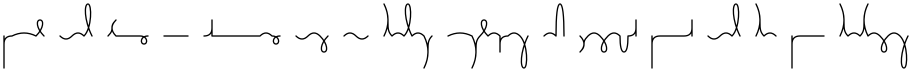

In [802]:
show_grafoni_type("there will come a time when you believe everything is finished that will be the beginning")

dh uv2 r   lv1 uv1 l   k-beg mv2 m   mv2   t-beg mv3 uv1 m   lv1 uv1 n   uv1 lv1   b-beg uv1 l uv1 v-end   uv2 v r uv1 th uv1 ng   uv1 z   f uv1 n uv1 sh t-end   dh mv2 t   lv1 uv1 l   b-beg uv1   dh mv2   b-beg uv1 g uv1 n uv1 ng


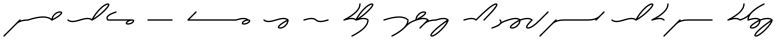

In [803]:
show_grafoni("there will come a time when you believe everything is finished that will be the beginning",bend=True)

mv2   g-beg r uv2 uv1 t-end   d-beg uv1 l   mv2 v-end   t-beg mv3 uv1 m   uv1 z   l lv3 s t-end   b-beg mv3 uv1   dh mv2   p-beg r uv2 z mv2 n t-end   uv1 n d mv2 r uv2 k t-end   m uv2 th mv2 d   mv2 v-end   r uv1 k lv3 r d uv1 ng   b-beg uv1 z n uv1 s   k-beg lv3 r mv2 s p mv3 n d mv2 n s


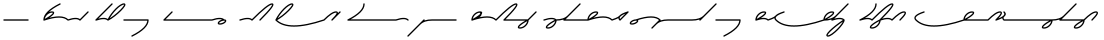

In [804]:
show_grafoni("a great deal of time is lost by the present indirect method of recording business correspondence")

In [805]:
show_grafoni("world")

lv1 mv2 r l d-end


In [806]:
show_grafoni(["k", "s"])

k s


In [807]:
# change last curve to be a little longer, and flat.  do nothing with negatives, but do something with non-negatives, including zero
def r_extend(strokes,length=1):
    strokes = strokes.copy()
    if length < 0:
        return strokes
    s = strokes[-1]
    if s[0] == 'move':
        strokes[-1] = ('move',s[1]+length,s[2])
    if s[0] == 'line':
        strokes[-1] = ('quadratic',s[1],s[2],s[1]+length,s[2])
    if s[0] == 'quadratic':
        strokes[-1] = ('cubic',s[1],s[2],s[3],s[4],s[3]+length,s[4])
    if s[0] == 'cubic':
        strokes[-1] = ('cubic',s[1],s[2],s[3],s[6],s[5]+length,s[6]) #note I kinda just flatten the end
    return strokes

# change first curve to be a little longer and flat, translate the rest
# assumes you start at 0,0 (as all should)
def l_extend(strokes,length = 1):
    strokes = strokes.copy()
    if length < 0:
        return strokes
    s = strokes[0]
    if s[0] == 'move':
        strokes[0] = ('move',s[1]+length,s[2])
    if s[0] == 'line':
        strokes[0] = ('quadratic',length,0,s[1]+length,s[2])
    if s[0] == 'quadratic':
        strokes[0] = ('cubic',length,0,s[1]+length,s[2],s[3]+length,s[4])
    if s[0] == 'cubic':
        strokes[0] = ('cubic',s[1]+length,0,s[3]+length,s[4],s[5]+length,s[6]) #note I kinda just flatten the end
    return [strokes[0]] + translate(strokes[1:],length,0)
    

In [808]:
def show_extended(letter,l_length,r_length):
    out = [('move',0,0)]
    out += r_extend(l_extend(letter_forms[letter],l_length),r_length)
    print(out)
    display(svgStrokes(out))

In [809]:
show_extended("t",-1,1)

[('move', 0, 0), ('quadratic', 2, 0, 2, -2), ('line', 2, -4), ('quadratic', 2, 0, 3, 0)]


In [810]:
def show_kern(l_letter,r_letter,l_length,r_length):
    out = [('move',0,0)]
    out += r_extend(letter_forms[l_letter],l_length)
    out = concat(out,l_extend(letter_forms[r_letter],r_length))
    display(svgStrokes(out))

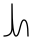

In [892]:
show_kern("d","s",1,1)

#potential ligatures
* k lv1
* th r
* f r
* f l
* s m
* s n
* s f
* k sh
* sh r
* m p
* m p
* n t
* n d

In [893]:
from collections import defaultdict

# this dictionary will hold kerning instructions for pairs of letters, it says how much to kern the left letter on the right and the right letter on the left
kerning = defaultdict(lambda: (-1,-1))
kerning[("t-beg","r")] = (0.5,1.5)
kerning[("t-beg","l")] = (0.5,1.5)
kerning[("d-beg","r")] = (0.5,1.5)
kerning[("d-beg","l")] = (0.5,1.5)
kerning[("t","r")] = (0.5,1.5)
kerning[("t","l")] = (0.5,1.5)
kerning[("d","r")] = (0.5,1.5)
kerning[("d","l")] = (0.5,1.5)
kerning[("t","s")] = (1,1)
kerning[("t","z")] = (1,1)
kerning[("d","s")] = (1,1)
kerning[("d","z")] = (1,1)
kerning[("g-beg","r")] = (1,1)
kerning[("g-beg","l")] = (1,1)
kerning[("k-beg","r")] = (1,1)
kerning[("k-beg","l")] = (1,1)
kerning[("g","r")] = (0.5,1)
kerning[("g","l")] = (0.5,1)
kerning[("k","r")] = (0.5,1)
kerning[("k","l")] = (0.5,1)
kerning[("r","p")] = (1,0.5)
kerning[("r","b")] = (1,0.5)
kerning[("l","p")] = (1,0.5)
kerning[("l","b")] = (1,0.5)
kerning[("p-beg","r")] = (1.5,1)
kerning[("p-beg","l")] = (1.5,1)
kerning[("b-beg","r")] = (1.5,0.5)
kerning[("b-beg","l")] = (1.5,0.5)
kerning[("p","r")] = (0.5,1)
kerning[("p","l")] = (0.5,1)
kerning[("b","r")] = (0.5,0.5)
kerning[("b","l")] = (0.5,0.5)
kerning[("r","l")] = (1,1)
kerning[("r","k")] = (0.5,0.5)
kerning[("r","g")] = (0.5,0.5)
kerning[("r","s")] = (1.5,0.5)
kerning[("r","z")] = (1.5,0.5)
kerning[("l","r")] = (1,1)
kerning[("l","k")] = (0.5,0.5)
kerning[("l","g")] = (0.5,0.5)
kerning[("l","s")] = (1.5,0.5)
kerning[("l","z")] = (1.5,0.5)
kerning[("s","t-end")] = (1,0.5)
kerning[("s","d-end")] = (1,0.5)
kerning[("z","t-end")] = (1,0.5)
kerning[("z","d-end")] = (1,0.5)
kerning[("r","t-end")] = (1,0.5)
kerning[("r","d-end")] = (1,0.5)
kerning[("l","t-end")] = (1,0.5)
kerning[("l","d-end")] = (1,0.5)
kerning[("k","t-end")] = (0.5,0.5)
kerning[("k","d-end")] = (0.5,0.5)
kerning[("g","t-end")] = (0.5,0.5)
kerning[("g","d-end")] = (0.5,0.5)
kerning[("s","p")] = (0.5,0.5)
kerning[("s","b")] = (0.5,0.5)
kerning[("z","p")] = (0.5,0.5)
kerning[("z","b")] = (0.5,0.5)
kerning[("s","k")] = (0.5,0.5)
kerning[("s","g")] = (0.5,0.5)
kerning[("z","k")] = (0.5,0.5)
kerning[("z","g")] = (0.5,0.5)
kerning[("s","r")] = (0.5,1.5)
kerning[("s","l")] = (0.5,1.5)
kerning[("z","r")] = (0.5,1.5)
kerning[("z","l")] = (0.5,1.5)
kerning[("k","s")] = (0.5,0.5)
kerning[("k","z")] = (0.5,0.5)
kerning[("g","s")] = (0.5,0.5)
kerning[("g","z")] = (0.5,0.5)
kerning[("k-beg","s")] = (0.5,0.5)
kerning[("k-beg","z")] = (0.5,0.5)
kerning[("g-beg","s")] = (0.5,0.5)
kerning[("g-beg","z")] = (0.5,0.5)
kerning[("t","r")] = (0.5,1.5)
kerning[("t","l")] = (0.5,1.5)
kerning[("d","r")] = (0.5,1.5)
kerning[("d","l")] = (0.5,1.5)
kerning[("r","mv1")] = (1,-1)
kerning[("r","mv2")] = (1,-1)
kerning[("r","mv3")] = (1,-1)
kerning[("l","mv1")] = (1,-1)
kerning[("l","mv2")] = (1,-1)
kerning[("l","mv3")] = (1,-1)
kerning[("mv1","r")] = (-1,1)
kerning[("mv2","r")] = (-1,1)
kerning[("mv3","r")] = (-1,1)
kerning[("mv1","l")] = (-1,1)
kerning[("mv2","l")] = (-1,1)
kerning[("mv3","l")] = (-1,1)
kerning[("n","mv1")] = (1,-1)
kerning[("n","mv2")] = (1,-1)
kerning[("n","mv3")] = (1,-1)
kerning[("ng","mv1")] = (1,-1)
kerning[("ng","mv2")] = (1,-1)
kerning[("ng","mv3")] = (1,-1)
kerning[("mv1","n")] = (-1,1)
kerning[("mv2","n")] = (-1,1)
kerning[("mv3","n")] = (-1,1)
kerning[("mv1","ng")] = (-1,1)
kerning[("mv2","ng")] = (-1,1)
kerning[("mv3","ng")] = (-1,1)
kerning[("n","sh")] = (1,1)
kerning[("n","zh")] = (1,1)
kerning[("ng","sh")] = (1,1)
kerning[("ng","zh")] = (1,1)

In [827]:
def show_grafoni_kerned(in_string,bend = True):
    chars = in_string
    if isinstance(chars, str):
        chars = process_ends(grafoni_spell(in_string))
    print(" ".join(chars))
    out = [('move',0,0)]
    last_char = " "
    for l in chars:
        if l in letter_forms:
            l_kern,r_kern = kerning[(last_char,l)]
            last_char = l
            out = concat(r_extend(out,l_kern),l_extend(letter_forms[l],r_kern))
        else:
            print("error: " + l)
    if bend:
        #return display(svgStrokes(shear(scale(out,1,0.5),by=-1/sqrt(3))))
        return display(svgStrokes(shear(scale(out,1,0.5),by=-1)))
    else:
        return display(svgStrokes(out))

s p l uv3 sh   lv1 mv2 r l d-end


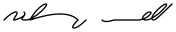

In [828]:
show_grafoni_kerned("splash world")

mv2   g-beg r uv2 uv1 t-end   d-beg uv1 l   mv2 v-end   t-beg mv3 uv1 m   uv1 z   l lv3 s t-end   b-beg mv3 uv1   dh mv2   p-beg r uv2 z mv2 n t-end   uv1 n d mv2 r uv2 k t-end   m uv2 th mv2 d   mv2 v-end   r uv1 k lv3 r d uv1 ng   b-beg uv1 z n uv1 s   k-beg lv3 r mv2 s p mv3 n d mv2 n s


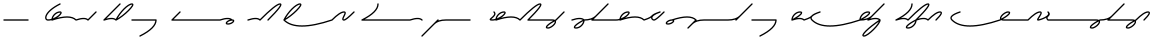

In [829]:
show_grafoni_kerned("a great deal of time is lost by the present indirect method of recording business correspondence")

s p uv2 uv1 s   dh mv2   f-beg mv3 uv1 n mv2 l   f-beg r mv2 n t uv1 r   dh uv1 z   mv2 r   dh mv2   v-beg lv3 uv1 uv1 d zh uv1 z   mv2 v-end   dh mv2   s t mv3 r sh uv1 p-end   uv2 n mv2 r p r mv3 uv1 z


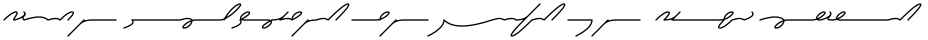

In [830]:
show_grafoni_kerned("space the final frontier these are the voyages of the starship enterprise")

h-beg uv2 l lv2 mv1   h-beg mv3 mv1   mv2 r   uv1 lv1   f uv1 l uv1 ng   t-beg mv2 d uv2 uv1


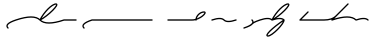

In [831]:
show_grafoni_kerned("hello how are you feeling today")

mv3 uv1   n lv1   dh mv2   m lv2 mv1 m mv2 n t-end   dh mv2 t   mv3 uv1   f uv2 l   uv1 n t lv1   dh mv2   f uv1 sh mv2 r   dh mv2 t   m mv3 uv1   b-beg mv1 k-end   lv1 mv1 d   n mv3 t   b-beg uv1   d-beg uv1 s t r lv3 uv1 d-end   uv2 z   mv3 uv1   h-beg uv3 d-end   p-beg l uv3 n d-end


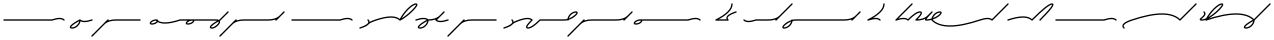

In [832]:
show_grafoni_kerned("I knew the moment that I fell into the fissure that my book would not be destroyed as I had planned")

In [908]:
def show_grafoni_kerned_wrapped(in_string,wrap = 100,shear_val=-1,line_space=20,v_scale=0.5):
    chars = in_string
    if isinstance(chars, str):
        chars = process_ends(grafoni_spell(in_string))
    print(" ".join(chars))
    out = [('move',0,0)]
    last_char = " "
    for l in chars:
        if l in letter_forms:
            l_kern,r_kern = kerning[(last_char,l)]
            last_char = l
            out = concat(r_extend(out,l_kern),l_extend(letter_forms[l],r_kern))
        else:
            print("error: " + l)
        if last_char == " "  and out[-1][-2] + shear_val*v_scale*out[-1][-1] > wrap:
            out.append(('move',-shear_val*v_scale*(out[-1][-1]+line_space),out[-1][-1]+line_space))
    return display(svgStrokes(shear(scale(out,1,v_scale),by=shear_val)))

mv3 uv1   n lv1   dh mv2   m lv2 mv1 m mv2 n t-end   dh mv2 t   mv3 uv1   f uv2 l   uv1 n t lv1   dh mv2   f uv1 sh mv2 r   dh mv2 t   m mv3 uv1   b-beg mv1 k-end   lv1 mv1 d   n mv3 t   b-beg uv1   d-beg uv1 s t r lv3 uv1 d-end   uv2 z   mv3 uv1   h-beg uv3 d-end   p-beg l uv3 n d .   uv2 z   mv3 uv1   f uv2 l   uv1 n t lv1   dh mv2 t   s t mv3 r uv1   uv1 k s p uv3 n s
error: .


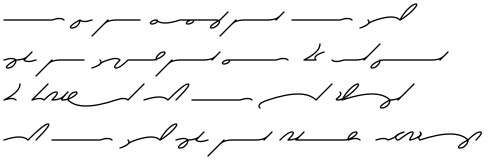

In [847]:
show_grafoni_kerned_wrapped("I knew the moment that I fell into the fissure that my book would not be destroyed as I had planned. as I fell into that starry expanse")

dh uv2 r   lv1 uv1 l   k-beg mv2 m   mv2   t-beg mv3 uv1 m   lv1 uv1 n   uv1 lv1   b-beg uv1 l uv1 v-end   uv2 v r uv1 th uv1 ng   uv1 z   f uv1 n uv1 sh t-end   dh mv2 t   lv1 uv1 l   b-beg uv1   dh mv2   b-beg uv1 g uv1 n uv1 ng


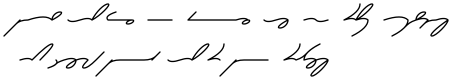

In [848]:
show_grafoni_kerned_wrapped("there will come a time when you believe everything is finished that will be the beginning")

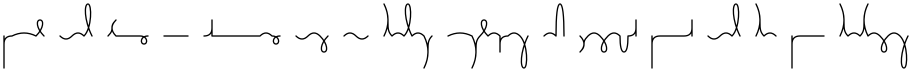

In [849]:
show_grafoni_type("there will come a time when you believe everything is finished that will be the beginning")

mv3 uv1   r uv1 mv2 l mv3 uv1 z d ,   dh mv2   m lv2 mv1 m mv2 n t-end   mv3 uv1   f uv2 l   uv1 n t lv1   dh mv2   f uv1 sh mv2 r ,   dh mv2 t   dh mv2   b-beg mv1 k-end   lv1 mv1 d   n mv3 t   b-beg uv1   d-beg uv1 s t r lv3 uv1 d-end   uv2 z   mv3 uv1   h-beg uv3 d-end   p-beg l uv3 n d .   uv1 t-end   k-beg mv2 n t uv1 n uv1 lv1 d   f-beg mv3 l uv1 ng   uv1 n t lv1   dh mv2 t   s t mv3 r uv1   uv1 k s p uv3 n s   mv2 v-end   lv1 uv1 t sh   mv3 uv1   h-beg uv3 d-end   lv2 mv1 n l uv1   mv2   f-beg l uv1 t uv1 ng   g-beg l uv1 m p s .   mv3 uv1   h-beg uv3 v-end   t-beg r mv3 uv1 d-end   t-beg uv1   s p uv2 k uv1 mv2 l uv2 uv1 t-end   lv1 uv2 r   uv1 t-end   m mv3 uv1 t-end   h-beg uv3 v-end   l uv3 n d uv1 d ,   b-beg mv2 t   mv3 uv1   m mv2 s t-end   mv2 d m uv1 t ,   h-beg lv2 lv1 uv2 v uv2 r — —   s mv2 t sh   k-beg mv2 n d zh uv2 k t sh mv2 r   uv1 z   f uv1 lv1 t mv2 l .   s t uv1 l ,   dh mv2   k-beg lv1 uv2 sh mv2 n   mv2 v-end   h-beg lv1 z   h-beg uv3 n z   m mv3 uv1 t-end 

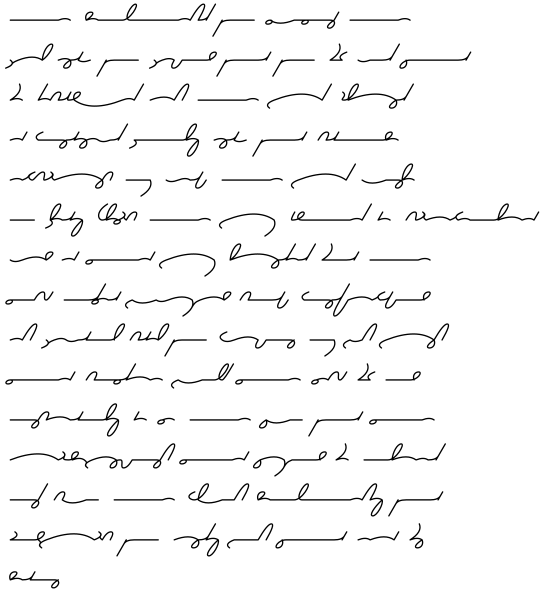

In [853]:
show_grafoni_kerned_wrapped("I realized, the moment I fell into the fissure, that the book would not be destroyed as I had planned. It continued falling into that starry expanse of which I had only a fleeting glimpse. I have tried to speculate where it might have landed, but I must admit, however— such conjecture is futile. Still, the question of whose hands might someday hold my mist book are unsettling to me. I know that my apprehensions might never be allayed, and so I close, realizing that perhaps, the ending has not yet been written.",shear_val=-1/sqrt(3))

dh uv2 r   lv1 uv1 l   k-beg mv2 m   mv2   t-beg mv3 uv1 m   lv1 uv1 n   uv1 lv1   b-beg uv1 l uv1 v-end   uv2 v r uv1 th uv1 ng   uv1 z   f uv1 n uv1 sh t-end   dh mv2 t   lv1 uv1 l   b-beg uv1   dh mv2   b-beg uv1 g uv1 n uv1 ng


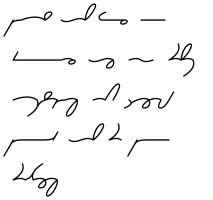

In [856]:
show_grafoni_kerned_wrapped("there will come a time when you believe everything is finished that will be the beginning",shear_val=-1/sqrt(3),wrap=40)

#potential ligatures
* k lv1
* th r
* ~~f r~~
* ~~f l~~
* s m
* s n
* ~~s f~~
* k sh
* sh r
* m p
* m p
* ~~n t~~
* ~~n d~~

In [1050]:
show_kern("f-beg","r",-1,-1)

In [1049]:
def print_pair(l,ll):
    return str(concat(letter_forms[l],letter_forms[ll]))

print_pair("f-beg","l")

"[('move', 0, 4), ('quadratic', 2, 2, 0, 0), ('cubic', 1, -2, 1, -8, 0, -8), ('cubic', -1, -8, -1, -4, 0, 0)]"

In [1074]:
ligatures = {
    "n_t": [('cubic',1,2,1,4,0,4),('cubic',-1,4,-1,2,0,0),('quadratic',1,-2,1,-4),('line',1,0)],
    "n_d": [('cubic',1,2,1,4,0,4),('cubic',-1,4,-1,2,0,0),('quadratic',1,-2,1,-4),('line',1,-8),('line',1,0)],
    "th_uv1": [('line',0,4),('line',0,2),('cubic',0,0,1*vowel_scale,-1*vowel_scale,2*vowel_scale,0)],
    "th_uv2": [('line',0,4),('line',0,2),('cubic',0,0,2*vowel_scale,-2*vowel_scale,4*vowel_scale,0)],
    "th_uv3": [('line',0,4),('line',0,2),('cubic',0,0,4*vowel_scale,-4*vowel_scale,8*vowel_scale,0)],
    "dh_uv1": [('line',0,8),('line',0,2),('cubic',0,0,1*vowel_scale,-1*vowel_scale,2*vowel_scale,0)],
    "dh_uv2": [('line',0,8),('line',0,2),('cubic',0,0,2*vowel_scale,-2*vowel_scale,4*vowel_scale,0)],
    "dh_uv3": [('line',0,8),('line',0,2),('cubic',0,0,4*vowel_scale,-4*vowel_scale,8*vowel_scale,0)],
    "s_f": [('quadratic', 0, -4, 1, -4), ('quadratic', 2, -4, 2, 0), ('quadratic', 2, 4, 1, 4), ('cubic', 2, 4, 2, 0, 3, 0)],
    "v_r": [('quadratic', 2, 4, 0, 8), ('cubic', 2, 4, 0, 2, 1, 0), ('cubic', 2, -2, 2, -4, 1, -4), ('cubic', 0, -4, 0, -2, 1, 0)],
    "v_l": [('quadratic', 2, 4, 0, 8), ('cubic', 2, 4, 0, 2, 1, 0), ('cubic', 2, -4, 2, -8, 1, -8), ('cubic', 0, -8, 0, -4, 1, 0)],
    "f_r": [('quadratic', 2, 2, 0, 4), ('cubic', 2, 2, 0, 1, 1, 0), ('cubic', 2, -2, 2, -4, 1, -4), ('cubic', 0, -4, 0, -2, 1, 0)],
    "f_l": [('quadratic', 2, 2, 0, 4), ('cubic', 2, 2, 0, 1, 1, 0), ('cubic', 2, -4, 2, -8, 1, -8), ('cubic', 0, -8, 0, -4, 1, 0)],
    "f-beg_r": [('move', 0, 4), ('quadratic', 2, 3, 2, 0), ('cubic', 2, -2, 2, -4, 1, -4), ('cubic', 0, -4, 0, -2, 2, 0)],
    "f-beg_l": [('move', 0, 4), ('quadratic', 2, 3, 2, 0), ('cubic', 2, -4, 2, -8, 1, -8), ('cubic', 0, -8, 0, -4, 2, 0)],
}

In [1075]:
display(svgStrokes([('move',0,0)]+ligatures["f-beg_l"]))

In [1053]:
def make_ligatures(in_list):
    out = []
    last = "None"
    for c in in_list:
        potential = last + "_" + c
        if potential in ligatures:
            out.append(potential) 
            last = "None"
        else:
            if last != "None":
                out.append(last)
            last = c
    if last != "None":
        out.append(last)
    return out

make_ligatures(["s", "t", "uv3", "n", "d", "z", " ", "s", "uv1", "ng"])

['s', 't', 'uv3', 'n_d', 'z', ' ', 's', 'uv1', 'ng']

In [1054]:
["s", "t", "uv3", "n", "d"]

['s', 't', 'uv3', 'n', 'd']

In [1055]:
def first(string):
    parts = string.split("_")
    if len(parts) == 0:
        return " "
    else:
        return parts[0]

def last(string):
    parts = string.split("_")
    if len(parts) == 0:
        return " "
    else:
        return parts[-1]

In [1056]:
def show_grafoni_kerned_wrapped_ligs(in_string,wrap = 100,shear_val=-1,line_space=20,v_scale=0.5):
    chars = in_string
    if isinstance(chars, str):
        chars = make_ligatures(process_ends(grafoni_spell(in_string)))
    print(" ".join(chars))
    out = [('move',0,0)]
    last_char = " "
    for l in chars:
        if l in letter_forms:
            l_kern,r_kern = kerning[(last(last_char),first(l))]
            last_char = l
            out = concat(r_extend(out,l_kern),l_extend(letter_forms[l],r_kern))
        elif l in ligatures:
            l_kern,r_kern = kerning[(last(last_char),first(l))]
            last_char = l
            out = concat(r_extend(out,l_kern),l_extend(ligatures[l],r_kern))
        else:
            print("error: " + l)
        if last_char == " "  and out[-1][-2] + shear_val*v_scale*out[-1][-1] > wrap:
            out.append(('move',-shear_val*v_scale*(out[-1][-1]+line_space),out[-1][-1]+line_space))
    return display(svgStrokes(shear(scale(out,1,v_scale),by=shear_val)))

s t uv3 n_d z   v uv2 n_t uv1 ng   dh mv2   dh_uv2 r   s_f uv1 r   f-beg_r uv3 n s   f-beg_l mv3 uv1 t-end


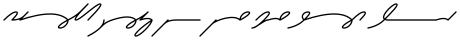

In [1076]:
show_grafoni_kerned_wrapped_ligs("stands venting the there sphere france flight")

s t uv3 n d z   v uv2 n t uv1 ng   dh mv2   dh uv2 r   s f uv1 r   f-beg r uv3 n s   f-beg l mv3 uv1 t-end


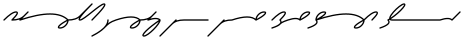

In [1073]:
show_grafoni_kerned_wrapped("stands venting the there sphere france flight")

dh_uv2 r   lv1 uv1 l   k-beg mv2 m   mv2   t-beg mv3 uv1 m   lv1 uv1 n   uv1 lv1   b-beg uv1 l uv1 v-end   uv2 v_r uv1 th_uv1 ng   uv1 z   f uv1 n uv1 sh t-end   dh mv2 t   lv1 uv1 l   b-beg uv1   dh mv2   b-beg uv1 g uv1 n uv1 ng


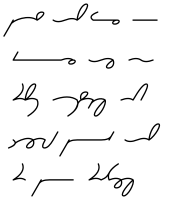

In [1059]:
show_grafoni_kerned_wrapped_ligs("there will come a time when you believe everything is finished that will be the beginning",shear_val=-1/sqrt(3),wrap=35)

dh uv2 r   lv1 uv1 l   k-beg mv2 m   mv2   t-beg mv3 uv1 m   lv1 uv1 n   uv1 lv1   b-beg uv1 l uv1 v-end   uv2 v r uv1 th uv1 ng   uv1 z   f uv1 n uv1 sh t-end   dh mv2 t   lv1 uv1 l   b-beg uv1   dh mv2   b-beg uv1 g uv1 n uv1 ng


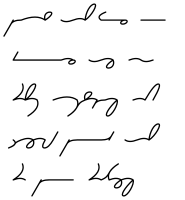

In [1060]:
show_grafoni_kerned_wrapped("there will come a time when you believe everything is finished that will be the beginning",shear_val=-1/sqrt(3),wrap=35)